<a href="https://colab.research.google.com/github/aimbsg/EVA4_S6/blob/master/5_EVA4S6_Plot_val_acc_loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Plotting validation accuracy and validation loss for all 4 combinations

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import os
os.chdir('/content/gdrive/My Drive/EVA4S6_Train_Test_Accu_Loss')
os.getcwd()

'/content/gdrive/My Drive/EVA4S6_Train_Test_Accu_Loss'

In [0]:
import torch
no_L1_no_L2_test_acc = torch.load("no_L1_no_L2_test_acc.pt")
no_L1_no_L2_test_loss = torch.load("no_L1_no_L2_test_loss.pt")
with_L1_no_L2_test_acc = torch.load("with_L1_no_L2_test_acc.pt")
with_L1_no_L2_test_loss = torch.load("with_L1_no_L2_test_loss.pt")
with_L2_no_L1_test_acc = torch.load("with_L2_no_L1_test_acc.pt")
with_L2_no_L1_test_loss = torch.load("with_L2_no_L1_test_loss.pt")
with_L1_and_L2_test_acc = torch.load("with_L1_and_L2_test_acc.pt")
with_L1_and_L2_test_loss = torch.load("with_L1_and_L2_test_loss.pt")

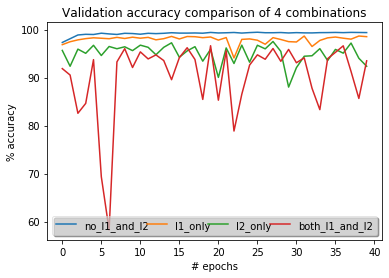

In [5]:
import matplotlib.pyplot as plt

ax = plt.subplot(111)
plt.title("Validation accuracy comparison of 4 combinations")
plt.xlabel('# epochs')
plt.ylabel('% accuracy')
for n in [1, 2, 3, 4]:    
    if(n == 1):
      plt.plot(no_L1_no_L2_test_acc, label = "no_l1_and_l2")       
    if(n == 2):
      plt.plot(with_L1_no_L2_test_acc, label = "l1_only")
    if(n == 3):
      plt.plot(with_L2_no_L1_test_acc, label = "l2_only")
    if(n == 4):
      plt.plot(with_L1_and_L2_test_acc, label = "both_l1_and_l2")    
leg = plt.legend(loc='lower center', ncol=4, mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)
plt.show()

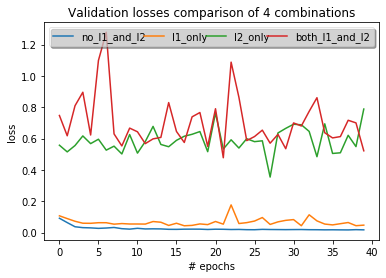

In [7]:
ax = plt.subplot(111)
plt.title("Validation losses comparison of 4 combinations")
plt.xlabel('# epochs')
plt.ylabel('loss')
for n in [1, 2, 3, 4]:    
    if(n == 1):
      plt.plot(no_L1_no_L2_test_loss, label = "no_l1_and_l2")       
    if(n == 2):
      plt.plot(with_L1_no_L2_test_loss, label = "l1_only")
    if(n == 3):
      plt.plot(with_L2_no_L1_test_loss, label = "l2_only")
    if(n == 4):
      plt.plot(with_L1_and_L2_test_loss, label = "both_l1_and_l2")    
leg = plt.legend(loc='upper center', ncol=4, mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)
plt.show()

WIP - Loading models to get 25 misclassified images (Creating separate modules for visualization as predecessor for Assignment 7, currently 25 images are created in the model code itself)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import torch
import os
os.chdir('/content/gdrive/My Drive/EVA4S6_Train_Test_Accu_Loss')
os.getcwd()

'/content/gdrive/My Drive/EVA4S6_Train_Test_Accu_Loss'

In [12]:
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

CUDA Available? False
cpu


In [0]:
import torch.nn as nn
import torch.nn.functional as F
dropout_value = 0.05
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        # Input Block
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(8),
            nn.Dropout(dropout_value)
        ) # output_size = 26

        # CONVOLUTION BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        ) # output_size = 24

        # TRANSITION BLOCK 1
        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
        ) # output_size = 24
        self.pool1 = nn.MaxPool2d(2, 2) # output_size = 12

        # CONVOLUTION BLOCK 2
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=8, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(8),
            nn.Dropout(dropout_value)
        ) # output_size = 10
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=8, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(8),
            nn.Dropout(dropout_value)
        ) # output_size = 8
        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        ) # output_size = 6
        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(32),
            nn.Dropout(dropout_value)
        ) # output_size = 4
        
        # OUTPUT BLOCK
        self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=4)
        ) # output_size = 1

        self.convblock8 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            # nn.BatchNorm2d(10),
            # nn.ReLU(),
            # nn.Dropout(dropout_value)
        ) 


        self.dropout = nn.Dropout(dropout_value)

    def forward(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.convblock3(x)
        x = self.pool1(x)
        x = self.convblock4(x)
        x = self.convblock5(x)
        x = self.convblock6(x)
        x = self.convblock7(x)
        x = self.gap(x)        
        x = self.convblock8(x)

        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

In [0]:
# model = MyModel().load_state_dict(torch.load("model_with_L1_no_L2.pth"))
model = torch.load("model_with_L1_no_L2.pth", map_location = torch.device('cpu'))

In [0]:
from torchvision import transforms
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

In [0]:
import numpy as np
def get_input_images(num):
    dataloader_args = dict(shuffle=True, batch_size=num, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)      
    test1 = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)  
    loader = torch.utils.data.DataLoader(test1, **dataloader_args)    
    dataiter = iter(loader)
    images, labels = dataiter.next()
    return images, labels

In [0]:
from torch.autograd import Variable
def predict_image(image):
    image_tensor = test_transforms(image).float()
    image_tensor = image_tensor.unsqueeze_(0)
    input = Variable(image_tensor)
    input = input.to(device)
    output = model(input)
    index = output.data.cpu().numpy().argmax()
    return index

In [0]:
from torchvision import datasets
to_pil = transforms.ToPILImage()
images, labels = get_input_images(100)

inc = 0
output = []
for ii in range(1, len(images)):
    image = to_pil(images[ii])
    index = predict_image(image)
    output.append(index)
    res = int(labels[ii]) == index
    if(res == False):
      inc += 1
      plt.subplot(5, 6, ii)
      plt.axis('off')
      print("Input image : ")
      plt.imshow(images[ii].numpy().squeeze(), cmap='gray_r')
      plt.show()
      print("Predicted output : ",index)
    if(inc == 25):
      break
          
print("Input : ",labels)      
print("Output : ",output)        